In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 6,6

In [3]:
# Farey Fractions
# SL(2,Z)
# Congruence Groups (here using a Sieve)

In [4]:
# https://stackoverflow.com/questions/11175131/code-for-greatest-common-divisor-in-python
from fractions import gcd

In [5]:
gcd(3,15)

3

In [8]:
import inspect

print inspect.getsource(gcd)

def gcd(a, b):
    """Calculate the Greatest Common Divisor of a and b.

    Unless b==0, the result will have the same sign as b (so that when
    b is divided by it, the result comes out positive).
    """
    while b:
        a, b = b, a%b
    return a



In [41]:
# Exercise, try this for Gaussian integers Z[i] 

def gcd(a, b):
    """Calculate the Greatest Common Divisor of a and b.

    Unless b==0, the result will have the same sign as b (so that when
    b is divided by it, the result comes out positive).
    """
    while b:
        a, b = b, a%b
    return a

In [66]:
def gcdZ(a,b):
    # we can study the sources of error introduced by our own Python implementation
    while b:
        a,b = b, ( ((a/b).real%1) + 1j*((a/b).imag%1))*b
        b = int(b.real) + 1j*int(b.imag)
        print b
    return a

In [86]:
def modZ(a,b):
    # dynamical systems tells us this is *one* modulus algorithm... not *the* modulus algorithm
    c = (((a/b).real %1) + 1j*((a/b).imag % 1))*b
    return int(c.real) + 1j*int(c.imag)

In [87]:
a = 3+31j
b = 2+1j
 

((a/b).real %1  + 1j*((a/b).imag %1))*b, a/b, gcdZ(a,b), modZ(a,b)

2j
1j
0j


(2.0000000000000018j, (7.4+11.8j), 1j, 2j)

In [55]:
import inspect

#print inspect.getsource(np.argmin)

In [46]:
def f(a,b):
    # how to tell the computer to remain in the first quadrant? 
    
    while b.real < 0 or b.imag < 0:
        b = b*1j
    
    c = ((a.real*b.real+a.imag+b.imag)/(b.real**2+b.imag**2))%1
    d = ((b.imag*a.real-a.imag*b.real)/(b.real**2+b.imag**2))%1
    
    z = (b.real + 1j*b.imag)*(c+1j*d)
    
    while z.real < 0 or z.imag < 0:
        z = z*1j

    return z

In [48]:
def g(a,b):

    # rotate b to first quadrant (think about adeles... what is "first quadrant"?)
    while b.real < 0 or b.imag < 0:
        b = b*1j
    
    q = 0
    
    while b.real**2 + b.imag**2 > a.real**2 + a.imag**2:
        # how do we know which one to pick ? b, -b, 1j*b, -1j*b

2j

In [ ]:
# Goal: compute horocycle flow... if we could find a reduction algorithm for PSL(2,Z)\PSL(2,R)
#
# who cares?  We might as well compute an arbitrary region... e.g. a large circle and compute the intersection
# of the entire PSL(2,Z) orbit.  we have the resouces to compute action of a circle or individual points... now the
# lebesgue measure (evenly space dots) turns into another measure.
#
# once we compute the Dirichlet domain, it might be possible change the Dirichlet domain slightly using 
# the geometry of parallel lines and geodesics

# $SL(2,\mathbb{Z})$ orbit of Horocycle 

In [3]:
(g,v) = (1j,1j)

In [8]:
def F( (a,b,c,d),(z,v) ):
    w = v/(c*z+d)**2
    
    W = w*np.conj(w)
    
    return ((a*z+b)/(c*z+d), w/W**0.5)

In [36]:
(h,w) = F( (2,3,3,5) , (1j,1j) )

In [37]:
h,w

((0.6176470588235294+0.02941176470588238j),
 (0.88235294117647045+0.47058823529411759j))

In [38]:
r = h.imag/(1+w.imag)
ctr = h - r*w

(0.57500000000000007, 0.62000000000000011, -0.01, 0.049999999999999996)

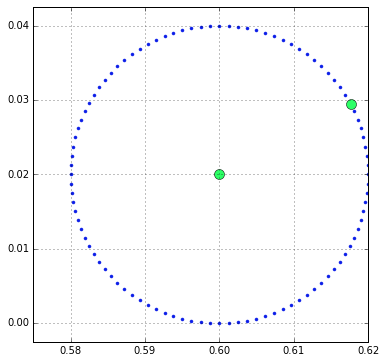

In [39]:
t = np.arange(0,1,0.01)
z = ctr + r*np.exp(2j*np.pi*t)

plt.plot(z.real, z.imag, '.', color="#0C1EE8")

plt.xlim([0.125,1.125])
#plt.ylim([0.5,0.8])

plt.plot( [h.real, ctr.real] , [h.imag, ctr.imag] , 'o', color="#2DFF66", markersize=10)

plt.grid(True)
plt.axis("Equal")

In [40]:
def G ((a,b,c,d), (g,v)):
    h,w = F((a,b,c,d),(g,v))
    
    r = h.imag/(1+w.imag)
    ctr = h - r*w
    
    return ctr,r

In [43]:
# compute a list of Farey Fractions of Level N

frac = lambda N : [(a,b) for b in range(N) for a in range(b) if gcd(a,b) == 1]

In [50]:
farey = lambda N : [(a,b,c,d) for b in range(N) for a in range(b) for d in range(N) for c in range(d) if a*d - b*c == 1]

In [55]:
farey(6)

[(1, 2, 0, 1),
 (1, 2, 1, 3),
 (1, 2, 2, 5),
 (1, 3, 0, 1),
 (1, 3, 1, 4),
 (2, 3, 1, 2),
 (2, 3, 3, 5),
 (1, 4, 0, 1),
 (1, 4, 1, 5),
 (3, 4, 2, 3),
 (1, 5, 0, 1),
 (2, 5, 1, 3),
 (3, 5, 1, 2),
 (4, 5, 3, 4)]

In [ ]:
S = lambda (a,b,c,d): (a,a+b,c,c+d)
T = lambda (a,b,c,d): 

(0.0, 6.0, -0.20000000000000001, 1.6000000000000001)

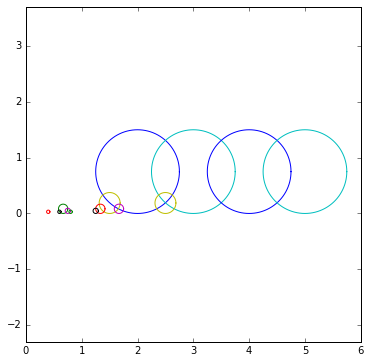

In [60]:
for A in farey(6):
    ctr, r = G(A, (1.5j, 1j))
    
    z = ctr + r*np.exp(2j*np.pi*np.arange(0,1+0.01,0.01))
    
    plt.plot(z.real, z.imag, '-')
    
plt.axis("Equal")

# Great Circle

In [18]:
def Q((a,b,c,d)):
    return np.array([
        [a**2+b**2-c**2-d**2,2*(b*c-a*d),2*(a*c+b*d)],
        [2*(b*c+a*d),a**2-b**2+c**2-d**2,2*(c*d-a*b)],
        [2*(b*d-a*c),2*(c*d+a*b),a**2-b**2-c**2+d**2]])

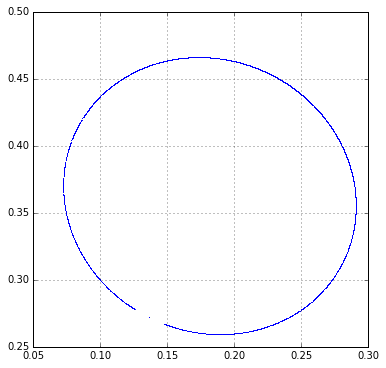

In [78]:
Z = []

a,b,c = 1,2,5

#v = np.array([a,b,c+0.01])*1.0/(a**2+b**2+c**2)**0.5
v = np.array([1.0,2.0,7.0])
v = v/(v[0]**2+v[1]**2+v[2]**2)**0.5

X = [(s,t) for s in np.arange(-10,10, 0.1) for t in np.arange(-10,10, 0.1) if (s,t) != (0,0)]


for (s,t) in X:
        x = (s*1, t*a, t*b, t*c)
        #print np.dot(Q(x), Q(x).T)/(x[0]**2+x[1]**2+x[2]**2+x[3]**2)**2
        z = np.dot( Q(x) , v )*1.0/(x[0]**2+x[1]**2+x[2]**2+x[3]**2)
        #print x
        Z += [z]
        
Z = np.array(Z)

plt.plot(Z[:,0], Z[:,1], '.', markersize=1)
plt.axis("Equal")
plt.grid(True)
#Z

#np.dot(A,A)
#print A
#print
#print np.dot(A,A.T)*1.0/(x[0]**2+x[1]**2+x[2]**2+x[3]**2)**2

In [37]:
np.vstack( [[1,2,3],[4,5,6]] )

array([[1, 2, 3],
       [4, 5, 6]])

# Circles

(2, 100)
(2, 100)
(200, 2)


(-1, 11)

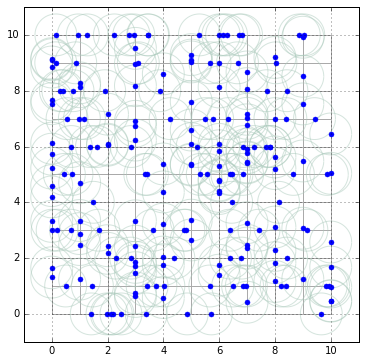

In [58]:
for a in np.arange(11):
    plt.plot( [0,10] , [a,a] , '-', c="#AAAAAA")
    plt.plot( [a,a] , [0,10] , '-', c="#AAAAAA")

N = 100

A = np.vstack( ( (11*np.random.random(N)).astype(int) , 10*np.random.random(N) ) )

print A.shape

B = np.vstack( ( (10*np.random.random(N)) , (11*np.random.random(N)).astype(int) ) )

print B.shape

C = np.hstack((A,B)).T

print C.shape

z = 0.75*np.exp(2j*np.pi*np.arange(0,1,0.01))

for c in C:
    plt.plot( c[0] + z.real, c[1] + z.imag, '-', color="#ABCABC", alpha=0.5)
    
plt.plot(C[:,0], C[:,1], '.', markersize = 10)

plt.grid(True)

plt.xlim([-1,11])
plt.ylim([-1,11])

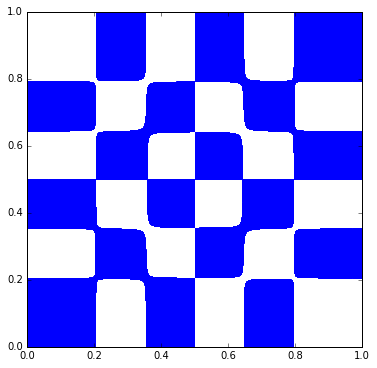

In [71]:
N  = 1000
dx = 1.0/N

x = lambda n : np.sin(2*np.pi*n*np.arange(0,1,dx))
y = lambda n : np.sin(2*np.pi*n*np.arange(0,1,dx))

z = 0*x(0)[None,...]*y(0)[...,None]

L = 3

g = lambda m, n : 2*(np.random.random() - 0.5)

f = lambda m, n : (m+n)**2 + 1*g(m,n)

for m in np.arange(-L,L+1):
    for n in np.arange(-L,L+1):
        z += 2*f(m,n)*x(m)[None,...]*y(n)[...,None]

Z = np.arange(0,1,dx)[None,...] + 1j*np.arange(0,1,dx)[...,None]

W = Z[np.where( z > 0.00)]

plt.plot(W.real, W.imag,'.', markersize=1)

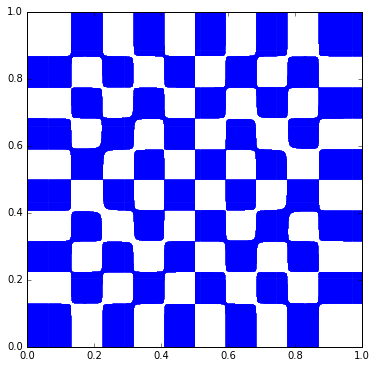

In [88]:
N  = 1000
dx = 1.0/N

x = lambda n : np.sin(2*np.pi*n*np.arange(0,1,dx))
y = lambda n : np.sin(2*np.pi*n*np.arange(0,1,dx))

z = 0*x(0)[None,...]*y(0)[...,None]

L = 5

g = lambda m, n : 2*(np.random.random() - 0.5)

f = lambda m, n : (1 )*(m+n)**2 + 1.25*g(m,n) 

for m in np.arange(-L,L+1):
    for n in np.arange(-L,L+1):
        z += 2*f(m,n)*x(m)[None,...]*y(n)[...,None]

Z = np.arange(0,1,dx)[None,...] + 1j*np.arange(0,1,dx)[...,None]

W = Z[np.where( z > 0.00)]

plt.plot(W.real, W.imag,'.', markersize=0.5)

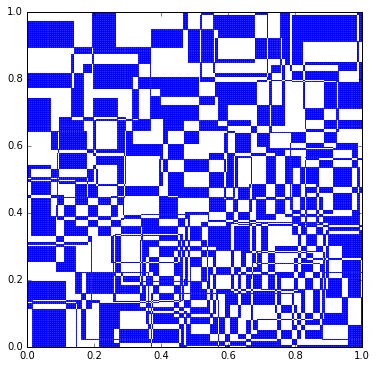

In [122]:
N = 500

dx = 1.0/N

x = lambda n : np.sin(2*np.pi*n*np.arange(0,1,dx))
y = lambda n : np.sin(2*np.pi*n*np.arange(0,1,dx))

z = 0*x(5)[None,...]*y(5)[...,None]+1

Z = np.arange(0,1,dx)[None,...] + 1j*np.arange(0,1,dx)[...,None]

for t in range(100):
    #pt   = int(10*np.random.random())*1.0/10 + 1j*int(10*np.random.random())*1.0/10
    pt = np.random.random() + 1j*np.random.random()

    #mask = np.where((Z - pt)*np.conjugate(Z - pt) < 1.0/5**2)
    #mask = np.where( np.abs((Z-pt).real) + np.abs((Z-pt).imag) < 1.0/5)
    mask = np.where( np.maximum( np.abs((Z-pt).real) , np.abs((Z-pt).imag) ) < 1.0/10 )

    z[mask] = -1*z[mask]


W = Z[np.where( z > 0.00)]

plt.plot(W.real, W.imag,'.', markersize=1)

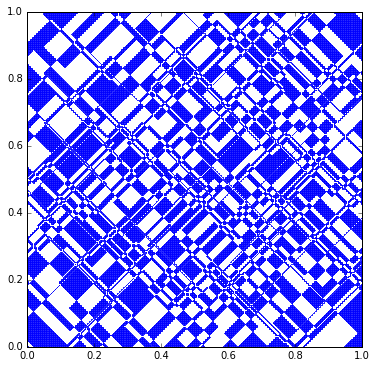

In [124]:
N = 500

dx = 1.0/N

x = lambda n : np.sin(2*np.pi*n*np.arange(0,1,dx))
y = lambda n : np.sin(2*np.pi*n*np.arange(0,1,dx))

z = 0*x(5)[None,...]*y(5)[...,None]+1

Z = np.arange(0,1,dx)[None,...] + 1j*np.arange(0,1,dx)[...,None]

for t in range(100):
    #pt   = int(10*np.random.random())*1.0/10 + 1j*int(10*np.random.random())*1.0/10
    pt = np.random.random() + 1j*np.random.random()

    #mask = np.where((Z - pt)*np.conjugate(Z - pt) < 1.0/5**2)
    mask = np.where( np.abs((Z-pt).real) + np.abs((Z-pt).imag) < 1.0/5)
    #mask = np.where( np.maximum( np.abs((Z-pt).real) , np.abs((Z-pt).imag) ) < 1.0/10 )

    z[mask] = -1*z[mask]


W = Z[np.where( z > 0.00)]

plt.plot(W.real, W.imag,'.', markersize=1)

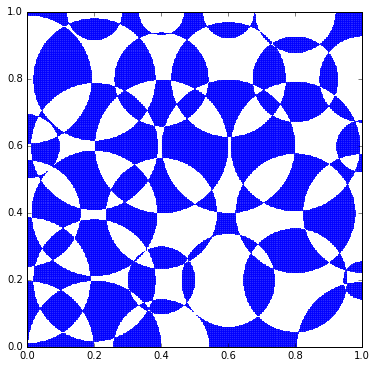

In [148]:
N = 500

dx = 1.0/N

x = lambda n : np.sin(2*np.pi*n*np.arange(0,1,dx))
y = lambda n : np.sin(2*np.pi*n*np.arange(0,1,dx))

z = 0*x(5)[None,...]*y(5)[...,None]+1

Z = np.arange(0,1,dx)[None,...] + 1j*np.arange(0,1,dx)[...,None]

#for t in range(50):
for m in range(13):
    for n in range(13):
        #pt   = int(10*np.random.random())*1.0/10 + 1j*int(10*np.random.random())*1.0/10
        #pt = np.random.random() + 1j*np.random.random()
        pt = m*1.0/5 + n*1.0j/5
        
        mask = np.where((Z - pt)*np.conjugate(Z - pt) < np.random.random()*1.0/5**2)
        #mask = np.where( np.abs((Z-pt).real) + np.abs((Z-pt).imag) < 1.0/5)
        #mask = np.where( np.maximum( np.abs((Z-pt).real) , np.abs((Z-pt).imag) ) < 1.0/10 )
    
        if np.random.random() > 0.1:
            z[mask] = -1*z[mask]


W = Z[np.where( z > 0.00)]

plt.plot(W.real, W.imag,'.', markersize=1)

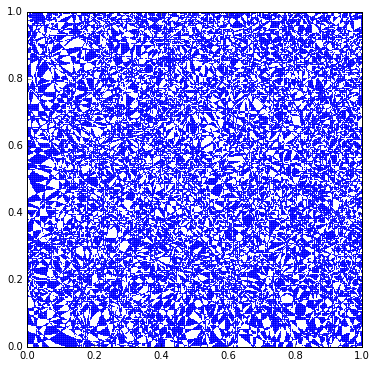

In [149]:
N = 500

dx = 1.0/N

x = lambda n : np.sin(2*np.pi*n*np.arange(0,1,dx))
y = lambda n : np.sin(2*np.pi*n*np.arange(0,1,dx))

z = 0*x(5)[None,...]*y(5)[...,None]+1

Z = np.arange(0,1,dx)[None,...] + 1j*np.arange(0,1,dx)[...,None]

#for t in range(50):
for m in range(25):
    for n in range(25):
        #pt   = int(10*np.random.random())*1.0/10 + 1j*int(10*np.random.random())*1.0/10
        #pt = np.random.random() + 1j*np.random.random()
        pt = m*1.0/20 + n*1.0j/20
        
        mask = np.where((Z - pt)*np.conjugate(Z - pt) < np.random.random()*1.0/5**2)
        #mask = np.where( np.abs((Z-pt).real) + np.abs((Z-pt).imag) < 1.0/5)
        #mask = np.where( np.maximum( np.abs((Z-pt).real) , np.abs((Z-pt).imag) ) < 1.0/10 )
    
        if np.random.random() > 0.1:
            z[mask] = -1*z[mask]


W = Z[np.where( z > 0.00)]

plt.plot(W.real, W.imag,'.', markersize=1)

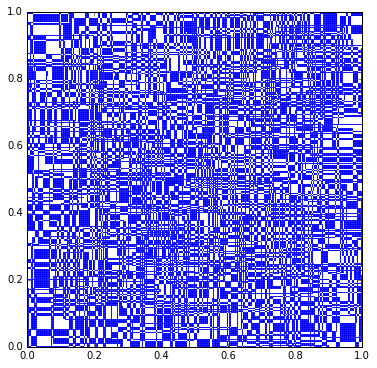

In [151]:
N = 500

dx = 1.0/N

x = lambda n : np.sin(2*np.pi*n*np.arange(0,1,dx))
y = lambda n : np.sin(2*np.pi*n*np.arange(0,1,dx))

z = 0*x(5)[None,...]*y(5)[...,None]+1

Z = np.arange(0,1,dx)[None,...] + 1j*np.arange(0,1,dx)[...,None]

for t in range(500):
    #pt   = int(10*np.random.random())*1.0/10 + 1j*int(10*np.random.random())*1.0/10
    pt = np.random.random() + 1j*np.random.random()

    #mask = np.where((Z - pt)*np.conjugate(Z - pt) < 1.0/5**2)
    #mask = np.where( np.abs((Z-pt).real) + np.abs((Z-pt).imag) < 1.0/5)
    mask = np.where( np.maximum( np.abs((Z-pt).real) , np.abs((Z-pt).imag) ) < 1.0/10 )

    z[mask] = -1*z[mask]


W = Z[np.where( z > 0.00)]

plt.plot(W.real, W.imag,'.', markersize=1)